# Problem Statement
Variations of the density of subsurface rock give rise to variations of the gravity field at the Earth surface.
Therefore, from measurements of the gravity field at the Earth surface, one can in principle infer density
variations of subsurface rock.

Variations of the vertical component of the gravity field $d(s)$ along a line $s$ at the surface are related to
variations $m(t)$ of the mass density along a line $t (0 ≤ t ≤ 1)$ at a depth $z$ below the surface by the
Fredhold integral equation of the first kind 

$$ d(s) = \int_0^1 K(s,t)m(t)dt $$

with kernel

$$ K(s,t) = \frac{z}{(z^2 + (s-t^2))^{3/2}}$$

All quantities have been nondimensionalized and are $O(1)$. In discrete form, we can write the relation
between measurements $\textbf{d} = (d_1, . . . , d_m)$ of gravity variations at $m$ points along a line at the surface and variations of the density $\textbf{m} = (m_1, . . . , m_n)$ at $n$ points along a subsurface line as a linear regression
model

$$\textbf{d} = \textbf{Gm} + \epsilon$$

where  is a vector of measurement errors, and the $m × n$ design matrix $\textbf{G}$ is a discrete representation of the integral operator.

The file $\texttt{gravity.txt}$ contains synthetic measurements of gravity variations $\textbf{d}$ at $m = 15$ equally spaced points along the line $0 ≤ s ≤ 1$. The file $\texttt{integral.txt}$ contains the matrix $\textbf{G}$ that relates gravity variations at the $m = 15$ points along the surface to density variations $\textbf{m}$ at $n = m = 15$ points at a depth of $z = 0.25$ below the points of the surface measurements. The standard deviation of the measurement error, $\sigma$ is about 0.1.

note: when calculating answers to the following questions, try to avoid taking the inverse of matrices
that could possibly be singular.

In [1]:
# Import data
import numpy as np
import warnings
warnings.filterwarnings('ignore')

d = np.fromfile("gravity.txt", sep=' ')
G = np.fromfile("integral.txt", sep=' ').reshape(len(d),len(d))
z = 0.25
sig = 0.1
i = np.arange(1,len(d)+1)

## Part (a): Problem Statement
Compute the singular value decomposition of $\textbf{G}$ and plot the spectrum of singular values (i.e.,
make a scatter plot of $s_i$ vs $i$, where $s_i$ are the diagonal values of $\textbf{S}$). How does this help classify the type of problem we are dealing with?

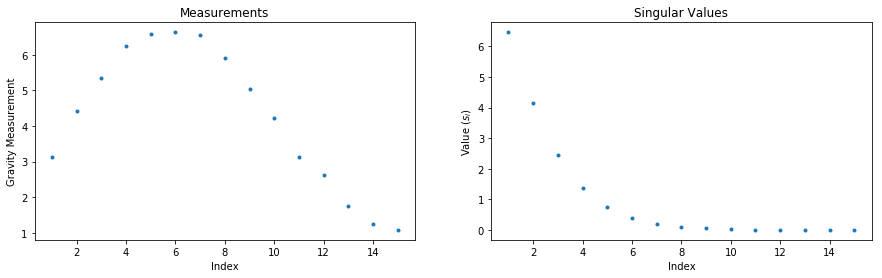

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(i,d, '.')
plt.title('Measurements')
plt.xlabel('Index')
plt.ylabel('Gravity Measurement')

U,S,VT = np.linalg.svd(G)
V = VT.T
plt.subplot(1,2,2)
plt.plot(i,S, '.')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value ($s_i$)');

## Part (a): Explanation
As shown in the right-hand figure, singular values decrease drastically and are nearly zero by the sixth index. This tells us that the sigular values after the sixth index won't contribute toward our solution and will only contribute to solution instability.

## Part (b): Problem Statement
Compute and plot the ordinary least-sqaures estimate, $\textbf{m}_{LS}$, of the density variations. Does this appear to represent plausible density variations? Explain the magnitude of the least-squares estimate and why the least-squares estimate is not a good estimate of the density variations.

Condition Number:  8725.670911274237


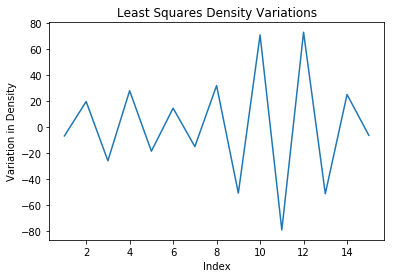

In [3]:
mLS = np.linalg.lstsq(G,d)[0]
C = np.linalg.cond(G)
print('Condition Number: ', C)
plt.plot(i, mLS)
plt.title('Least Squares Density Variations')
plt.xlabel('Index')
plt.ylabel('Variation in Density');

## Part (b): Explanation
The variations shown above are an order of magnitude greater than the measurements shown in the left figure of Part (a). This is likely due to the fact that this is an ill-posed problem as shown by the very high condition number.

## Part (c): Problem Statement
Plot a few right singular vectors and comment on their appearance. How does the number of
zero-crossings of the right singular vectors behave as a function of singular value?

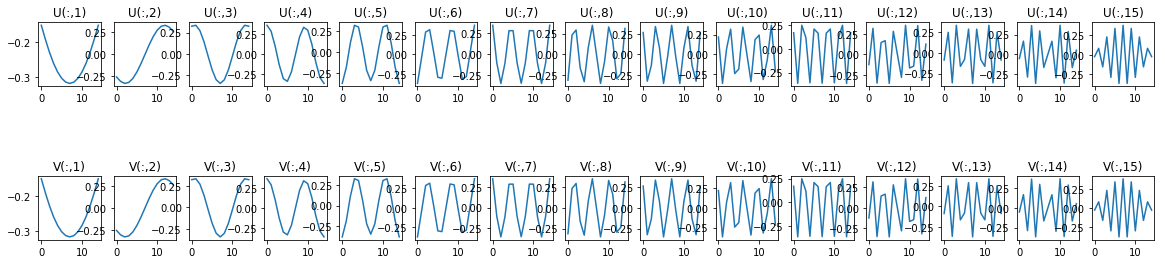

In [4]:
plt.figure(figsize=(20,4))
for j in i-1:
    plt.subplot(3,15,j+1)
    plt.plot(U[:,j])
    plt.title('U(:,' + str(j+1) + ')')
    plt.subplot(3,15,j+31)
    plt.plot(V[:,j])
    plt.title('V(:,' + str(j+1) + ')')

## Part (c): Explanation
As the index increases, so does the number of zero crossings for both $U$ and $V$. I assume this is tied to the very small sigular values associated with each vector, which are causing instability.

## Part (d): Problem Statement:
Make a Picard Plot of the singular values $s_i$, $|\textbf{u}^T_i \textbf{d}|$, and $|\textbf{u}^T_i \textbf{d}|/s_i$ vs $i$. Use a log-scale for the vertical axis. Comment on what this shows.

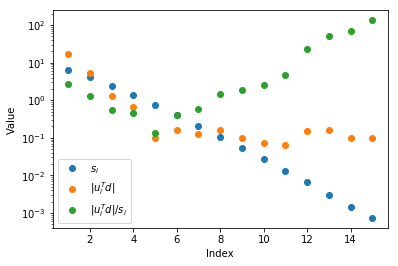

In [5]:
Uid = np.abs(np.matmul(U.T,d))
Uids = np.divide(Uid,S)

plt.semilogy(i,S, 'o')
plt.semilogy(i,Uid, 'o')
plt.semilogy(i,Uids, 'o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['$s_i$','$|u^T_i d|$', '$|u^T_i d|/s_i$']);

## Part (d): Explanation

Since $|\textbf{u}^T_i \textbf{d}|$ decays faster than $s_i$ before index 5 the discrete Picard condition is satisfied in this region and we can assume that a solution is stable. However, after the fifth index, we see that $|\textbf{u}^T_i \textbf{d}|$ is no longer decaying faster than $s_i$ and is actually growing. Similarly, $|\textbf{u}^T_i \textbf{d}| / s_i $ grows after the fifth index indicating that we cannot rule out instability due to small sigular values in that region.

## Part (e): Problem Statement

Make plots that show how your residual some of squared error ($||\textbf{Gm}_{p'} − \textbf{d}||^2_2$) and the magnitude of $m_{p'}$ ($||m_{p'}||^2_2$) change as $p'$ ranges from 0 to 15.

p =  15


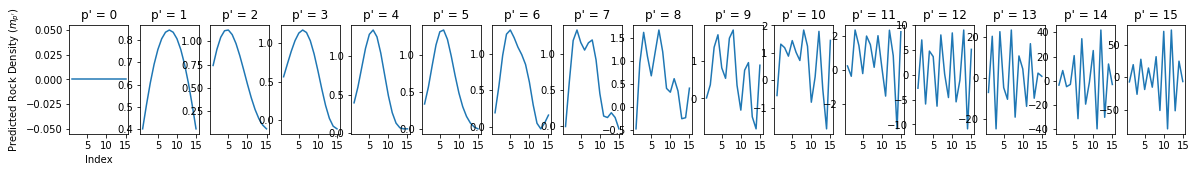

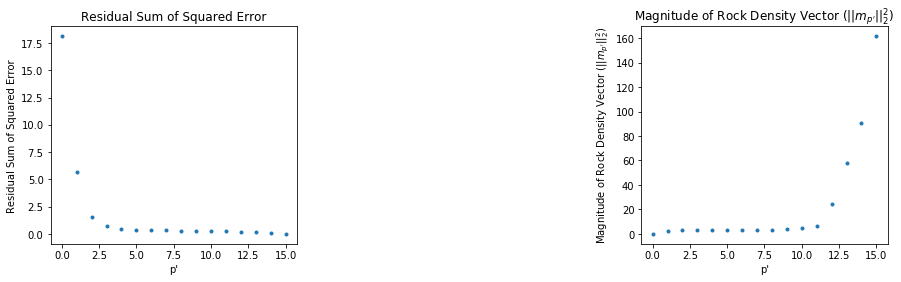

In [6]:
p = np.linalg.matrix_rank(G)
print('p = ',p)

plt.figure(figsize=(20,2))
mp = np.zeros((p,p+2),float)
delta = np.zeros((p+1,1),float)
magmp = np.zeros((p+1,1),float)


for j in range(0,p+1):
    if j>0:
        mp[:,j] = mp[:,j-1] + np.matmul(U[:,j-1],d)/S[j-1]*V[:,j-1]
    delta[j,0] = np.linalg.norm(np.matmul(G,mp[:,j])-d)
    magmp[j,0] = np.linalg.norm(mp[:,j])
    plt.subplot(1,p+1,j+1)
    plt.plot(i,mp[:,j])
    plt.title('p\' = ' + str(j))
    if j == 0:
        plt.xlabel('Index')
        plt.ylabel('Predicted Rock Density ($m_{p\'}$)')
    

mpp1 = mp[:,1]
mpp4 = mp[:,4]
mpp8 = mp[:,8]
    
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(delta,'.')
plt.xlabel('p\'')
plt.ylabel('Residual Sum of Squared Error')
plt.title('Residual Sum of Squared Error')

plt.subplot(1,3,3)
plt.plot(magmp, '.')
plt.xlabel('p\'')
plt.ylabel('Magnitude of Rock Density Vector ($||m_{p\'}||_2^2$)')
plt.title('Magnitude of Rock Density Vector ($||m_{p\'}||_2^2$)');

## Part (e): Explanation

We see that for a $p'$ value of zero, our predicted rock density is also zero. For $p' =1$, our density decayse with index. After $p' = 6$, instability seems to start having a large effect. Our residual sum of square error, seems to be nearly zero for $p'$ values greater than 3 and conversely, our prediction of rock density skyrockets for values of $p'$ greater than 11.


## Part (f): Problem Statement

Estimate the density variations with a truncated singular value decomposition, $\textbf{m}_{p'}$, based on $p'$ singular values using the discrepancy principle to determine $p'$.

In [7]:
dens1 = np.matmul(G,mpp1)
print(dens1)

[2.59986071 3.29038714 3.92672695 4.46848875 4.89935661 5.21170836
 5.40094489 5.46433203 5.40094489 5.21170836 4.89935661 4.46848875
 3.92672695 3.29038714 2.59986071]


## Part (f): Explanation

Based on the discrepancy principle as described in Aster et al, we should choose a $p'$ value such that  ($||\textbf{Gm}_{p'} − \textbf{d}||^2_2$) is smaller than $m$ or the length of our data space. Since $m=15$ and the Residual Sum of Squared Error plot from Part (e) shows that for $p'>0$, $||\textbf{Gm}_{p'} − \textbf{d}||^2_2 <15$ we choose $p' = 1$.

## Part (g): Problem Statement

How does the value of $p'$ estimated from the discrepancy principle compare to a value you might have inferred directly from your Picard Plot? How does it compare to a value of $p'$ estimated from assuming that $s_{i=p'} \approx \sigma$?

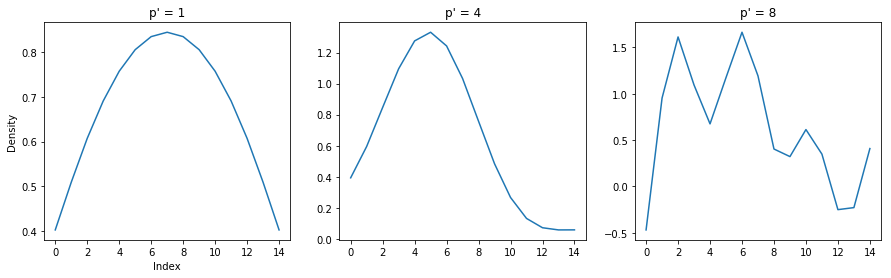

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mpp1)
plt.xlabel('Index')
plt.ylabel('Density')
plt.title('p\' = 1')

plt.subplot(1,3,2)
plt.plot(mpp4)
plt.title('p\' = 4')

plt.subplot(1,3,3)
plt.plot(mpp8)
plt.title('p\' = 8');

## Part (g): Explanation

Based on the discrepancy principle we should choose a $p'$ value of 1. Based on the Piccard plot, sigular values below index 5 should be acceptable so we choose a $p'$ value of 4. Based on the assumption that $s_{i=p'} \approx \sigma$, we see from the Piccard plot that $s_i$ is equal to $\sigma$ at about index 8 so we choose $p' = 8$ in this case. We see the first case is very simple while the final case is overly chaotic. So we should probably choose the Goldilocks value of $p'=4$.

## Part (h): Problem Statement

The synthetic "measurements" $\textbf{d}$ in $\texttt{gravity.txt}$ were generated by discretizing the integral equation, evaluating it for a mass distribution $ m(t) = sin(\pi t) + 0.5 sin(2 \pi t) $, and adding pseudo-
random noise to the implied gravity variations. Compare your estimates $\textbf{m}_{p'}$ to the exact solution $m(t_i)$ with $t_i = (i − 1)/(15 − 1)$ and $i = 1, . . . , 15$ in a plot and comment on the differences.

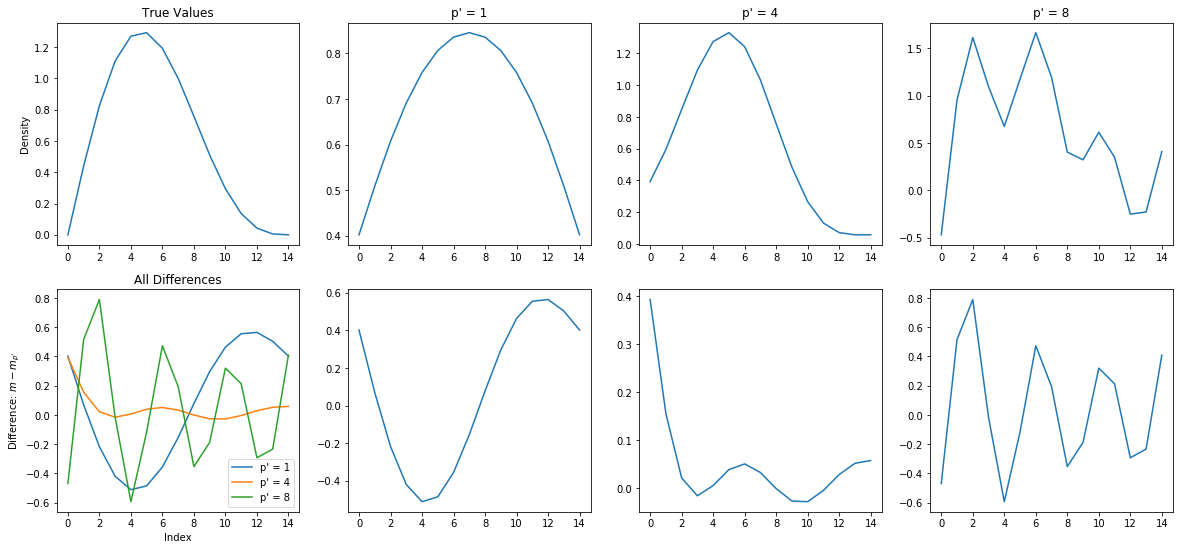

In [9]:
i = np.arange(1,16)
t = (i-1)/14
mt = np.sin(np.pi*t) + 0.5*np.sin(2*np.pi*t)

dmp1 = mpp1 - mt
dmp4 = mpp4 - mt
dmp8 = mpp8 - mt

plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.plot(mt);
plt.ylabel('Density')
plt.title('True Values')

plt.subplot(2,4,2)
plt.plot(mpp1)
plt.title('p\' = 1')

plt.subplot(2,4,3)
plt.plot(mpp4)
plt.title('p\' = 4')

plt.subplot(2,4,4)
plt.plot(mpp8)
plt.title('p\' = 8')

plt.subplot(2,4,5)
plt.plot(dmp1)
plt.plot(dmp4)
plt.plot(dmp8)
plt.title('All Differences')
plt.legend(['p\' = 1', 'p\' = 4', 'p\' = 8'])
plt.xlabel('Index')
plt.ylabel('Difference: $m - m_{p\'}$')

plt.subplot(2,4,6)
plt.plot(dmp1)

plt.subplot(2,4,7)
plt.plot(dmp4)

plt.subplot(2,4,8)
plt.plot(dmp8);

## Part (h): Explanation

Looking at the difference plots, the smallest differences seem to be in the $p' = 4$ case as above. So it seems by this example that the Piccard plot is the best tool for finding the extent to which the system can be simplified. 